In [9]:
#Import libraries for reading data into frame, analysis and visualization

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [10]:
#Import the CSV files into a Pandas Data Frame

In [7]:
violence = pd.read_csv('violence_against_women.csv')

In [8]:
contraceptive = pd.read_csv('contraceptive.csv', encoding='iso-8859-1')

In [11]:
#Sorting “contraceptive” data by Percentage distribution of women aged 15-49 (per country) - who have the relevant pregnancy intention and contraceptive use - in Descending Order 

In [12]:
contracept_sorted = contraceptive.sort_values(by='Percentage distribution of women aged 15-49  (per country)', ascending=False)

In [13]:
#Sorting “violence” data by Value in Descending Order  - Value in this dataset means % of people surveyed in the relevant group who agree with the question (e.g. the percentage of women aged 15-24 in Afghanistan who agree that a husband is justified in hitting or beating his wife if she burns the food)

In [14]:
violence_sorted = violence.sort_values(by='Value', ascending=False) 

In [15]:
# Checking for missing values

In [16]:
contracept_sorted.isnull().values.any()

False

In [17]:
violence_sorted.isnull().values.any()

True

In [18]:
#Replacing missing values

In [19]:
violence_sorted.fillna(0) 

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
66,351,Afghanistan,F,Employment,Employed for kind,... for at least one specific reason,01/01/2015,86.9
7783,394,Morocco,F,Employment,Employed for kind,... for at least one specific reason,01/01/2003,86.1
11023,412,Timor-Leste,F,Employment,Employed for kind,... for at least one specific reason,01/01/2016,85.2
7423,392,Mali,F,Employment,Employed for kind,... for at least one specific reason,01/01/2018,83.3
3666,371,Eritrea,F,Employment,Employed for kind,... for at least one specific reason,01/01/2002,82.8
...,...,...,...,...,...,...,...,...
12235,208,Yemen,M,Residence,Urban,... if she goes out without telling him,01/01/2013,0.0
12236,278,Yemen,M,Residence,Rural,... if she neglects the children,01/01/2013,0.0
12237,278,Yemen,M,Residence,Urban,... if she neglects the children,01/01/2013,0.0
12238,348,Yemen,M,Residence,Rural,... if she refuses to have sex with him,01/01/2013,0.0


In [20]:
# head.() showing sorted values to start having first impressions

In [21]:
violence_sorted.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
66,351,Afghanistan,F,Employment,Employed for kind,... for at least one specific reason,01/01/2015,86.9
7783,394,Morocco,F,Employment,Employed for kind,... for at least one specific reason,01/01/2003,86.1
11023,412,Timor-Leste,F,Employment,Employed for kind,... for at least one specific reason,01/01/2016,85.2
7423,392,Mali,F,Employment,Employed for kind,... for at least one specific reason,01/01/2018,83.3
3666,371,Eritrea,F,Employment,Employed for kind,... for at least one specific reason,01/01/2002,82.8


In [22]:
contracept_sorted.head()

,Continent,Sub-Continent,Country,Percentage distribution of women aged 15-49 (per country),Pregnancy intention,Contraceptive availability,Contraceptive method
144,Africa,Western Africa,Gambia,0.767790,Not wanting to avoid pregancy,Not applicable,Not applicable
384,Asia,Western Asia,Oman,0.763389,Not wanting to avoid pregancy,Not applicable,Not applicable
336,Asia,Southeast Asia,Timor-Leste,0.761478,Not wanting to avoid pregancy,Not applicable,Not applicable
84,Africa,Middle Africa,Chad,0.760539,Not wanting to avoid pregancy,Not applicable,Not applicable
444,Oceania,Polynesia,French Polynesia,0.760404,Not wanting to avoid pregancy,Not applicable,Not applicable


In [23]:
# Here my analysis starts

In [24]:
# Analysing how many women have the intention or not to avoid pregnancy grouped by “continent” and “pregnancy intention”

In [25]:
# The groupby function was the one that best suited this part of analysis since I wanted to know the difference amongst continents.

<Axes: xlabel='Continent'>

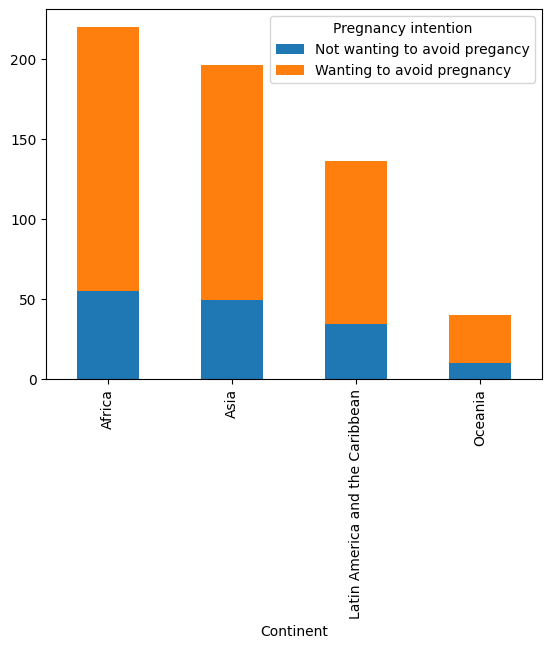

In [26]:
grouped = contraceptive.groupby(['Continent', 'Pregnancy intention']).size().unstack()
grouped.plot(kind='bar', stacked=True)


In [27]:
# Analysing how many women want to avoid pregnancy related to having available contraceptive to meet their needs

In [28]:
# Calculating value counts for "Pregnancy intention" and "Contraceptive availability"

In [29]:
pregnancy_counts = contraceptive['Pregnancy intention'].value_counts()

In [30]:
contraceptive_counts = contraceptive['Contraceptive availability'].value_counts()

In [31]:
# Creating a bar plot for visualization

In [32]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [33]:
# Plotting Pregnancy Intention

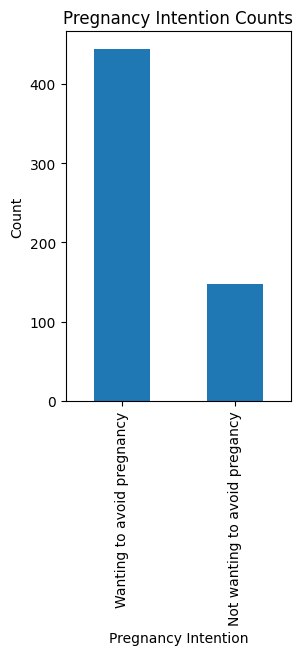

In [34]:
plt.subplot(1, 2, 1)
pregnancy_counts.plot(kind='bar')
plt.title('Pregnancy Intention Counts')
plt.xlabel('Pregnancy Intention')
plt.ylabel('Count')
plt.show()


In [35]:
# Plotting Contraceptive Availability

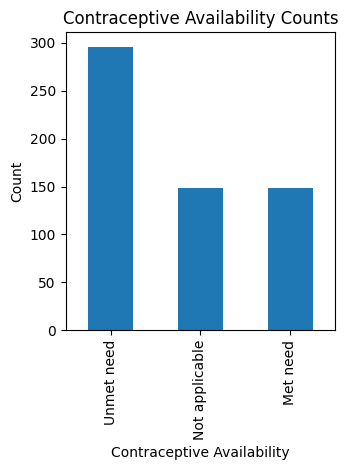

In [36]:
plt.subplot(1, 2, 2)
contraceptive_counts.plot(kind='bar')
plt.title('Contraceptive Availability Counts')
plt.xlabel('Contraceptive Availability')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [37]:
#This was my single analysis for “contraceptive” Data Frame.

In [38]:
#Now I will start analysing my second Data Frame, “violence” - This data was taken from a survey of men and women in African, Asian, and South American countries, exploring the attitudes and perceived justifications given for committing acts of violence against women. The data also explores different sociodemographic groups that the respondents belong to, including: Education Level, Marital status, Employment, and Age group.

In [39]:
# My first analysis is to have an overview of how many people with ages "15-24", "25-34", "35-49" years old participate of this survey.

In [40]:
# Filtered the Data Frame based on "Demographics Question" containing "age"

In [41]:
age_demographics = violence_sorted[violence_sorted['Demographics Question'].str.contains('age', case=False)]

In [42]:
# Counted the occurrences of each response in "Demographics Response"

In [43]:
response_counts = age_demographics['Demographics Response'].value_counts()

In [44]:
# Created a bar plot for visualization

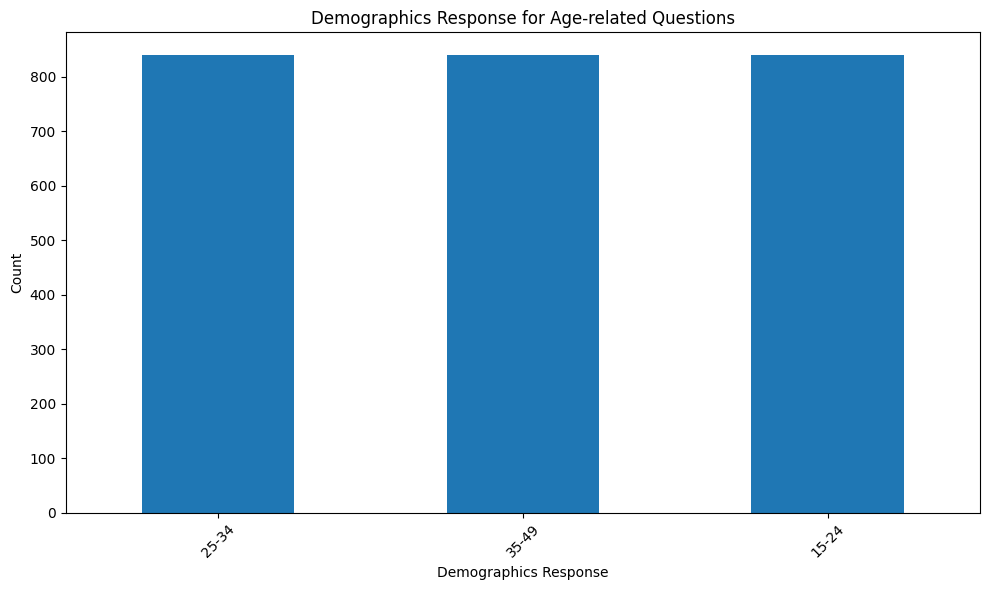

In [45]:
plt.figure(figsize=(10, 6))
response_counts.plot(kind='bar')
plt.title('Demographics Response for Age-related Questions')
plt.xlabel('Demographics Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
# Then I analysed the country with highest value (most violent country for women) and the lowest value (least violent country for women):

In [47]:
# Finding the country with the highest value

In [49]:
highest_value_country = violence_sorted.loc[violence_sorted['Value'].idxmax(), 'Country']

In [50]:
# Finding the country with the lowest value

In [51]:
lowest_value_country = violence_sorted.loc[violence_sorted['Value'].idxmin(), 'Country']

In [52]:
#printing results from findings

In [53]:
print(f"The country with the highest value, which means most violent country for women, is : {highest_value_country}")

The country with the highest value, which means most violent country for women, is : Afghanistan


In [54]:
print(f"The country with the lowest value, which means safest country for women, is: {lowest_value_country}")

The country with the lowest value, which means safest country for women, is: Albania


In [55]:
#Then I analysed what country would be the middle term for women to live in, not the most violent neither the least violent

In [56]:
# Calculating the median of the "Value" column

In [57]:
median_value = violence_sorted['Value'].median()

In [58]:
# Finding the country closest to the median value

In [59]:
middle_country = violence_sorted.loc[
    violence_sorted['Value'].sub(median_value).abs().idxmin(),
    'Country'
]

In [60]:
#printing the result from finding

In [61]:
print(f"The country closest to the median value is: {middle_country}")

The country closest to the median value is: Cameroon


In [62]:
# I analysed by country, how many women with higher or no education suffer from violence. I wanted to know if women’s education has or hasn’t a relation with them suffering from violence.

In [63]:
# Filtering the Data Frame for "No education" and "Higher" in the column “Demographics Responses”

In [64]:
filtered_df = violence_sorted[
    (violence_sorted['Demographics Response'] == 'No education') |
    (violence_sorted['Demographics Response'] == 'Higher')
]

In [65]:
# Removing rows with missing "Value" data

In [66]:
filtered_df = filtered_df.dropna(subset=['Value'])

In [67]:
# Creating a bar plot using seaborn for visualization

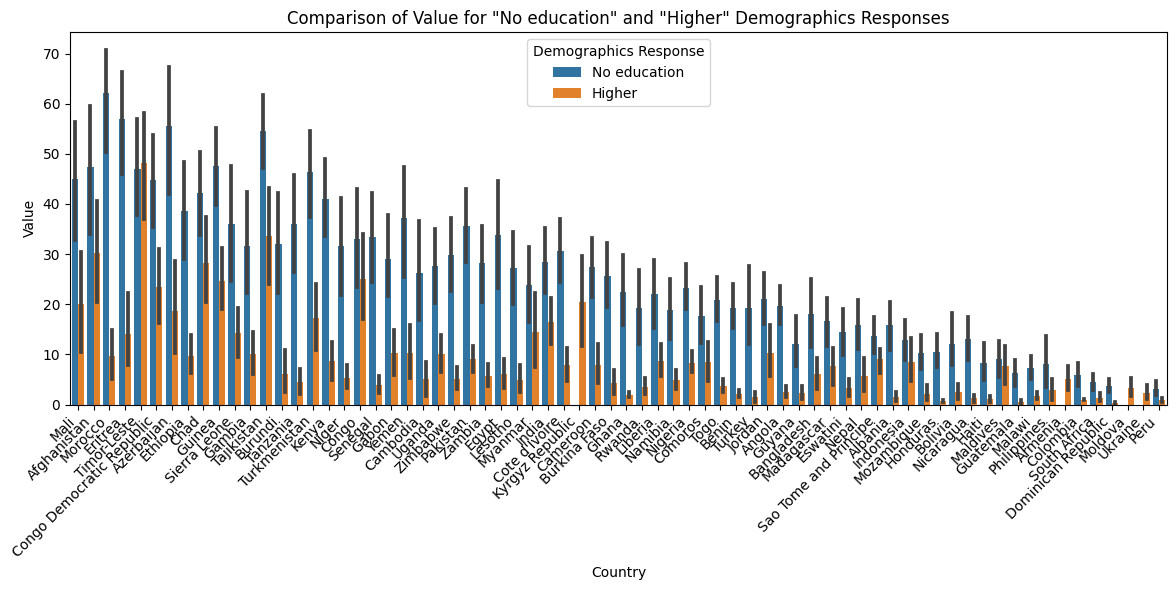

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Country', y='Value', hue='Demographics Response')
plt.title('Comparison of Value for "No education" and "Higher" Demographics Responses')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [69]:
# I analysed if employment status also make a difference when the subject is violence against women

In [77]:
# Filtering the Data Frame for the desired “Demographics Responses”

In [78]:
filtered_df = violence_sorted[
    (violence_sorted['Demographics Response'] == 'Unemployed') |
    (violence_sorted['Demographics Response'] == 'Employed for cash') |
    (violence_sorted['Demographics Response'] == 'Employed for kind') |
    (violence_sorted['Demographics Response'] == 'No education')
]

In [79]:
# Defining a custom colour palette

In [80]:
custom_palette = {
    'Unemployed': 'orange',
    'Employed for cash': 'green',
    'Employed for kind': 'pink',
    'No education': 'blue'  # Adjust color and label as needed
}

In [81]:
# Creating a plot for visualization

/home/codespace/.local/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


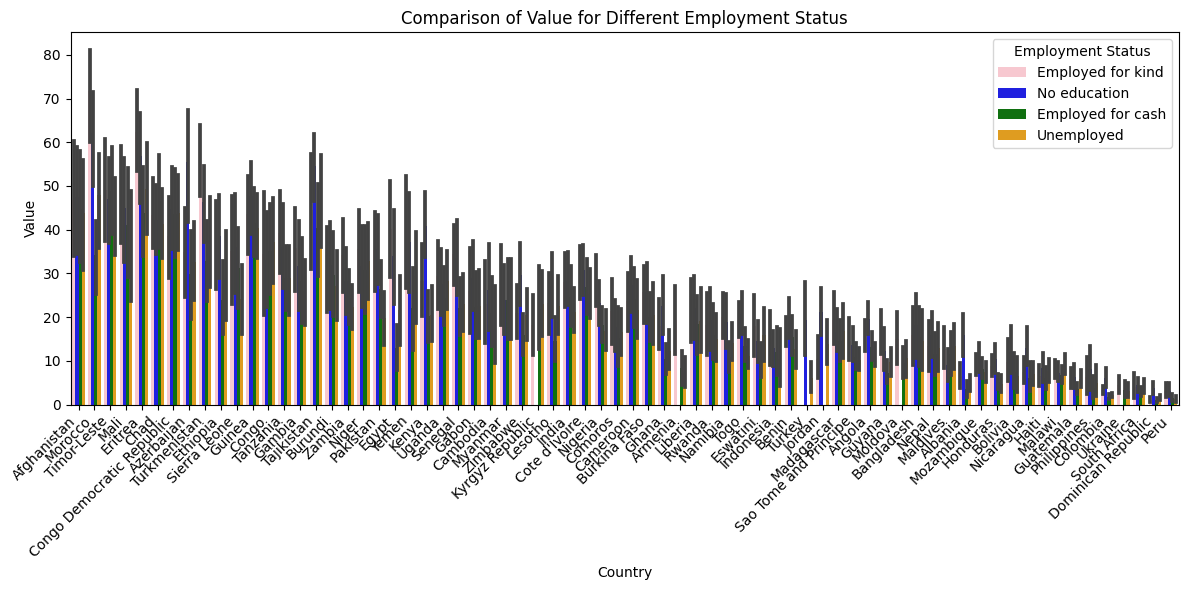

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_df,
    x='Country',
    y='Value',
    hue='Demographics Response',
    palette=custom_palette
)
plt.title('Comparison of Value for Different Employment Status')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Employment Status')
plt.show()


In [83]:
# For my next analysis, I need the full list of countries in the column "Country"

In [84]:
# Extracting the list of unique countries from the "Country" column

In [85]:
countries_list = violence_sorted['Country'].unique()

In [86]:
# Printing the list of countries

In [87]:
print(countries_list)

['Afghanistan' 'Morocco' 'Timor-Leste' 'Mali' 'Eritrea' 'Chad'
 'Congo Democratic Republic' 'Azerbaijan' 'Gambia' 'Turkmenistan'
 'Ethiopia' 'Guinea' 'Sierra Leone' 'Tajikistan' 'Burundi' 'Congo'
 'Tanzania' 'Zambia' 'Niger' 'Pakistan' 'Egypt' 'Kyrgyz Republic' 'Yemen'
 'Myanmar' 'Gabon' 'Kenya' 'Uganda' 'Senegal' 'Cambodia' 'Zimbabwe'
 'Cameroon' "Cote d'Ivoire" 'Lesotho' 'India' 'Nigeria' 'Comoros'
 'Liberia' 'Burkina Faso' 'Ghana' 'Armenia' 'Rwanda' 'Jordan' 'Moldova'
 'Namibia' 'Indonesia' 'Eswatini' 'Nepal' 'Togo' 'Angola' 'Benin' 'Turkey'
 'Madagascar' 'Sao Tome and Principe' 'Guyana' 'Bangladesh' 'Albania'
 'Maldives' 'Mozambique' 'Honduras' 'Bolivia' 'Nicaragua' 'Haiti'
 'Ukraine' 'Malawi' 'Guatemala' 'Philippines' 'South Africa' 'Colombia'
 'Dominican Republic' 'Peru']


In [88]:
#My list has 79 countries, which I divided them by religion. I wanted to separate those countries by the most known religions, to have an overview if there’s relation between religion and violence against women.

In [89]:
# Lists of countries by religious groups

In [90]:
islam_countries = ['Afghanistan', 'Morocco', 'Mali', 'Eritrea', 'Chad', 'Azerbaijan', 'Gambia', 'Turkmenistan', 'Ethiopia', 'Guinea', 'Sierra Leone', 'Tajikistan', 'Pakistan', 'Egypt', 'Kyrgyz Republic', 'Yemen', 'Gabon', 'Kenya', 'Uganda', 'Senegal', 'Comoros', "Cote d'Ivoire", 'Niger', 'Somalia']
christianity_countries = ['Timor-Leste', 'Congo Democratic Republic', 'Congo', 'Tanzania', 'Zambia', 'Burundi', 'Lesotho', 'Nigeria', 'Liberia', 'Burkina Faso', 'Ghana', 'Armenia', 'Rwanda', 'Namibia', 'Sao Tome and Principe', 'Guyana', 'Albania', 'Maldives', 'Honduras', 'Nicaragua', 'Dominican Republic', 'Peru']
hinduism_countries = ['Nepal']
buddhism_countries = ['Myanmar', 'Cambodia']
african_traditional_countries = ['Zimbabwe', 'Cameroon', 'Kenya', 'Uganda', 'South Africa']
multiple_religions_countries = ['India', 'Indonesia', 'Togo', 'Bangladesh', 'Mozambique', 'Turkey', 'Madagascar', 'Benin', 'Angola', 'Philippines', 'Colombia', 'Malawi', 'Guatemala', 'Haiti', 'Bolivia', 'Nicaragua', 'Haiti', 'Bolivia', 'South Africa']


In [91]:
# Creating a Data Frame with the categorized countries

In [92]:
categories_df = pd.DataFrame({
    'Country': islam_countries + christianity_countries + hinduism_countries +
               buddhism_countries + african_traditional_countries + multiple_religions_countries,
    'Religion': (['Islam'] * len(islam_countries)) +
                (['Christianity'] * len(christianity_countries)) +
                (['Hinduism'] * len(hinduism_countries)) +
                (['Buddhism'] * len(buddhism_countries)) +
                (['African Traditional'] * len(african_traditional_countries)) +
                (['Multiple Religions'] * len(multiple_religions_countries))
})


In [93]:
# Merging the categorized Data Frame with the “violence_sorted” Data Frame to get the "Value" for each category

In [94]:
merged_df = pd.merge(categories_df, violence_sorted, on='Country', how='left')

In [95]:
# Grouping the merged Data Frame by "Religion" and calculate the sum of "Value" for each group

In [96]:
grouped_df = merged_df.groupby('Religion')['Value'].sum().reset_index()

In [97]:
# Creating a bar plot using matplotlib for visualization

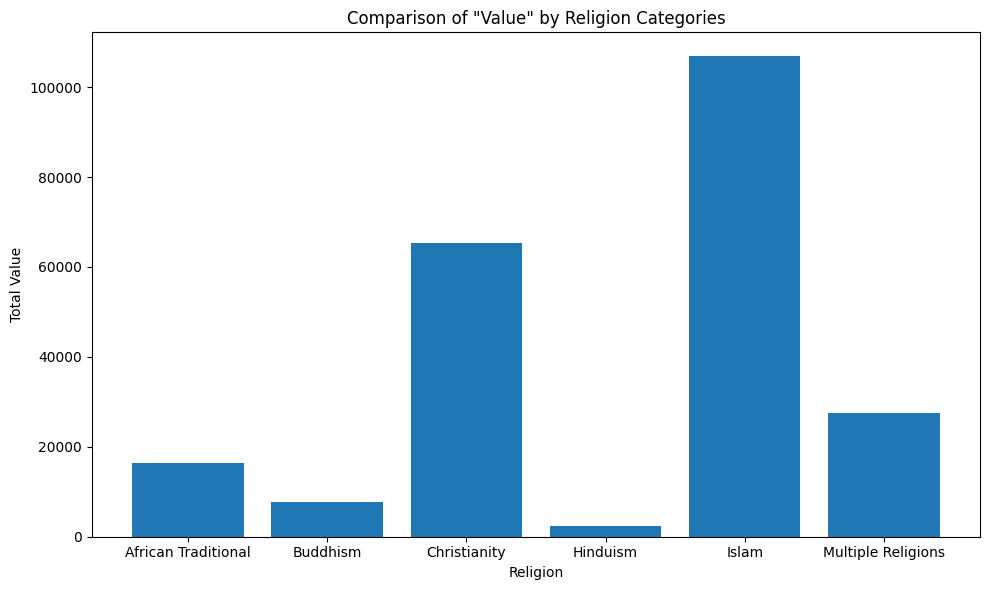

In [98]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Religion'], grouped_df['Value'])
plt.title('Comparison of "Value" by Religion Categories')
plt.xlabel('Religion')
plt.ylabel('Total Value')
plt.tight_layout()
plt.show()


In [99]:
# In this code, we create a new Data Frame called “categories_df” that includes all the categorized countries along with their respective religions. We then merge this Data Frame with the original “violence_sorted” Data Frame to get the "Value" for each category. After merging, we group the Data Frame by "Religion" and calculate the sum of "Value" for each group. Finally, we create a bar plot to compare the total "Value" for each religion category.

In [100]:
# I decided to add the countries’ religion as a column – First I created the religion list

In [101]:
islam_countries = ['Afghanistan', 'Morocco', 'Mali', 'Eritrea', 'Chad', 'Azerbaijan', 'Gambia', 'Turkmenistan', 'Ethiopia', 'Guinea', 'Sierra Leone', 'Tajikistan', 'Pakistan', 'Egypt', 'Kyrgyz Republic', 'Yemen', 'Gabon', 'Kenya', 'Uganda', 'Senegal', 'Comoros', "Cote d'Ivoire", 'Niger', 'Somalia']
christianity_countries = ['Timor-Leste', 'Congo Democratic Republic', 'Congo', 'Tanzania', 'Zambia', 'Burundi', 'Lesotho', 'Nigeria', 'Liberia', 'Burkina Faso', 'Ghana', 'Armenia', 'Rwanda', 'Namibia', 'Sao Tome and Principe', 'Guyana', 'Albania', 'Maldives', 'Honduras', 'Nicaragua', 'Dominican Republic', 'Peru']
hinduism_countries = ['Nepal']
buddhism_countries = ['Myanmar', 'Cambodia']
african_traditional_countries = ['Zimbabwe', 'Cameroon', 'Kenya', 'Uganda', 'South Africa']
multiple_religions_countries = ['India', 'Indonesia', 'Togo', 'Bangladesh', 'Mozambique', 'Turkey', 'Madagascar', 'Benin', 'Angola', 'Philippines', 'Colombia', 'Malawi', 'Guatemala', 'Haiti', 'Bolivia', 'Nicaragua', 'Haiti', 'Bolivia', 'South Africa']


In [102]:
# Creating a new column 'Religion' and initializing it as None

In [103]:
violence_sorted['Religion'] = None

In [104]:
# Setting the religion values based on the country lists

In [105]:
violence_sorted.loc[violence_sorted['Country'].isin(islam_countries), 'Religion'] = 'Islam'
violence_sorted.loc[violence_sorted['Country'].isin(christianity_countries), 'Religion'] = 'Christianity'
violence_sorted.loc[violence_sorted['Country'].isin(hinduism_countries), 'Religion'] = 'Hinduism'
violence_sorted.loc[violence_sorted['Country'].isin(buddhism_countries), 'Religion'] = 'Buddhism'
violence_sorted.loc[violence_sorted['Country'].isin(african_traditional_countries), 'Religion'] = 'African Traditional'
violence_sorted.loc[violence_sorted['Country'].isin(multiple_religions_countries), 'Religion'] = 'Multiple Religions'


In [106]:
# Displaying the updated Data Frame head.()

In [107]:
print(violence_sorted.head())

       RecordID      Country Gender Demographics Question  \
66          351  Afghanistan      F            Employment   
7783        394      Morocco      F            Employment   
11023       412  Timor-Leste      F            Employment   
7423        392         Mali      F            Employment   
3666        371      Eritrea      F            Employment   

      Demographics Response                              Question Survey Year  \
66        Employed for kind  ... for at least one specific reason  01/01/2015   
7783      Employed for kind  ... for at least one specific reason  01/01/2003   
11023     Employed for kind  ... for at least one specific reason  01/01/2016   
7423      Employed for kind  ... for at least one specific reason  01/01/2018   
3666      Employed for kind  ... for at least one specific reason  01/01/2002   

       Value      Religion  
66      86.9         Islam  
7783    86.1         Islam  
11023   85.2  Christianity  
7423    83.3         Islam  
3

In [108]:
# My next analysis is to know if there is relation between violence against women compared to their marital status.

In [109]:
# List of desired "Demographics Response" categories

In [110]:
desired_categories = ['Never married', 'Widowed, divorced, separated', 'Married or living together']

In [111]:
# Filtering the Data Frame for the desired "Demographics Response" categories

In [112]:
filtered_df = violence_sorted[violence_sorted['Demographics Response'].isin(desired_categories)]

In [113]:
# Creating a bar plot using seaborn for visualization

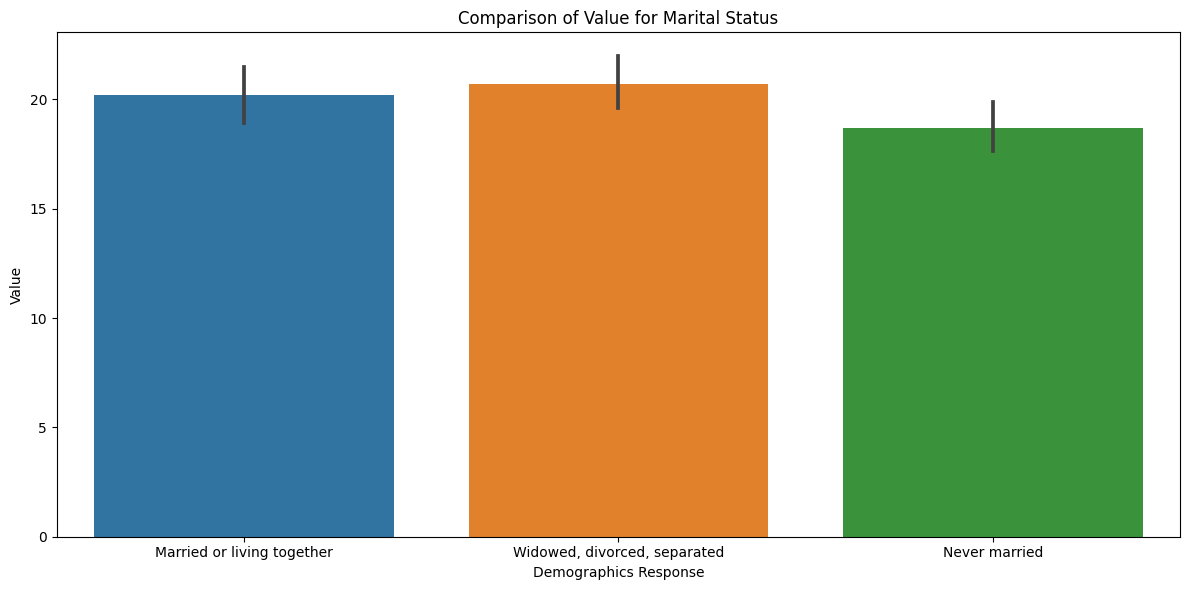

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Demographics Response', y='Value')
plt.title('Comparison of Value for Marital Status')  # Corrected line
plt.xlabel('Demographics Response')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [115]:
# In this code, we use the isin() function to filter the original “violence_sorted” Data Frame to include only rows with "Demographics Response" values that match the desired categories. We then create a bar plot using seaborn to compare the "Value" for the specified "Demographics Response" categories.

In [116]:
# Now my intention is to merge my violence against women Data Frame with my pregnancy and contraceptive Data Frame to analyse them together. I will merge them with how='inner', this means that the merge() function will only keep the rows where there is a matching "Country" value in both the "violence_sorted" and "contracept_sorted" data frames. Any rows with non-matching "Country" values will be dropped from the resulting merged_df data frame.

In [117]:
merged_df = violence_sorted.merge(contracept_sorted, on='Country', how='inner')

In [118]:
# I wanted to check the columns names of this new Data Frame

In [120]:
print(merged_df.columns)

Index(['RecordID', 'Country', 'Gender', 'Demographics Question',
       'Demographics Response', 'Question', 'Survey Year', 'Value', 'Religion',
       'Continent', 'Sub-Continent',
       'Percentage distribution of women aged 15-49  (per country)',
       'Pregnancy intention', 'Contraceptive availability',
       'Contraceptive method'],
      dtype='object')


In [121]:
# Then I wanted to check how many countries the Data Frame had in total

In [122]:
country_count = violence_sorted['Country'].nunique()

In [123]:
print("Number of unique countries:", country_count) 

Number of unique countries: 70


In [124]:
# Here I will start my merged analysis. I wanted to know, if religion impacts the intention of pregnancy in women. 

In [125]:
# This code will create a bar plot using seaborn that shows the counts of "Not wanting to avoid pregnancy" and "Wanting to avoid pregnancy" for each religion. The x-axis represents different religions, the y-axis represents the count, and different colors represent the two pregnancy intention categories. 

In [126]:
# Counting the occurrences of each combination of Pregnancy intention and Religion

In [127]:
count_df = merged_df.groupby(["Pregnancy intention", "Religion"]).size().reset_index(name="Count")

In [128]:
# Filtering for the desired values

In [129]:
not_wanting_to_avoid = count_df[(count_df["Pregnancy intention"] == "Not wanting to avoid pregnancy")]
wanting_to_avoid = count_df[(count_df["Pregnancy intention"] == "Wanting to avoid pregnancy")]


In [130]:
# Setting the style of seaborn

In [131]:
sns.set(style="whitegrid")

In [132]:
# Creating a bar plot using seaborn

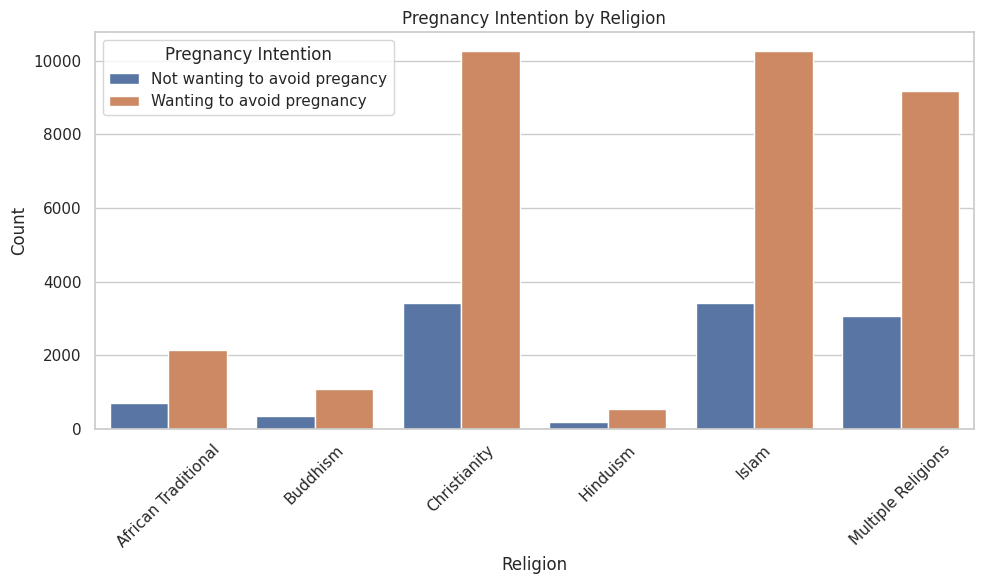

In [133]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Religion", y="Count", hue="Pregnancy intention", data=count_df)
plt.title("Pregnancy Intention by Religion")
plt.xlabel("Religion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Pregnancy Intention")
plt.tight_layout()
plt.show()


In [134]:
#To finish my analysis, I wanted to analyse by religion, if the contraceptive needs of women were or weren’t met. 

In [135]:
# Counting the occurrences of each combination of Contraceptive availability and Religion

In [136]:
count_df = merged_df.groupby(["Contraceptive availability", "Religion"]).size().reset_index(name="Count")

In [137]:
# Filtering for the desired values

In [138]:
met_need = count_df[(count_df["Contraceptive availability"] == "Met need")]
unmet_need = count_df[(count_df["Contraceptive availability"] == "Unmet need")]


In [139]:
# Setting the style of seaborn

In [140]:
sns.set(style="whitegrid")

In [141]:
# Creating a bar plot using seaborn

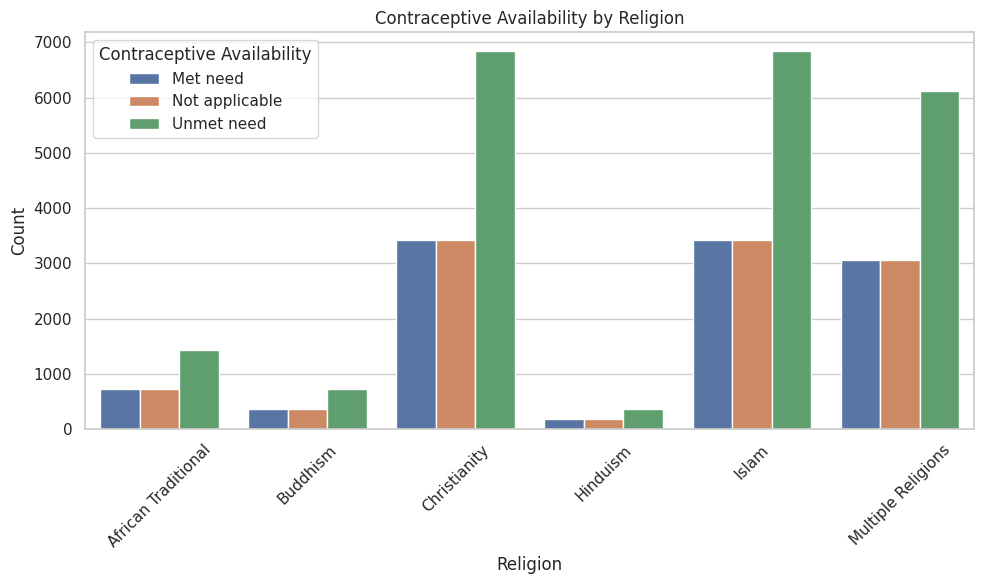

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Religion", y="Count", hue="Contraceptive availability", data=count_df)
plt.title("Contraceptive Availability by Religion")
plt.xlabel("Religion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Contraceptive Availability")
plt.tight_layout()
plt.show()
